<a href="https://colab.research.google.com/github/visith1577/tensorflow_advanced/blob/main/tf_custom_loops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Layer

In [2]:
class Variable(Layer):
  def __init__(self):
    super().__init__()
    self.one = tf.Variable(100)
    self.two =[tf.Variable(x) for x in range(4)]  

In [4]:
var = Variable() 

print([varss.numpy() for varss in var.variables])

[100, 0, 1, 2, 3]


In [6]:
import numpy as np

In [7]:
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0]) 
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0])  

#trainable variables 
w = tf.Variable(np.random.random(), trainable=True) 
b = tf.Variable(np.random.random(), trainable=True) 

In [12]:
def simple_loss(y_true, y_pred):
  return tf.abs(y_true, y_pred)

In [9]:
learning_rate = 0.001

In [19]:

xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0]) 
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0])  

#trainable variables 
w = tf.Variable(np.random.random(), trainable=True) 
b = tf.Variable(np.random.random(), trainable=True) 


# loss 
def simple_loss(real_y, pred_y) : 
  return tf.abs(real_y - pred_y) 

learning_rate = 0.001

def fit_data(x_real, y_real): 

  with tf.GradientTape(persistent=True) as tape: 
    pred_y = w * x_real + b  
    reg_loss = simple_loss(y_real, pred_y) 

  w_gradient = tape.gradient(reg_loss, w) 
  b_gradient = tape.gradient(reg_loss, b) 

  w.assign_sub(w_gradient * learning_rate) 
  b.assign_sub(b_gradient * learning_rate) 


for _ in range(500) : 
  fit_data(xs, ys)  

print(f"w = {w.numpy()} + b = {b.numpy()}") 

w = 1.935805320739746 + b = -0.8087546825408936


In [21]:
x = tf.Variable([1.0])  

with tf.GradientTape() as tape : 
    grad = x * x 


print(tape.gradient(grad, x))

tf.Tensor([2.], shape=(1,), dtype=float32)


In [22]:
x = tf.ones((2, 2))

In [26]:
with tf.GradientTape()  as tape:
  t = tape.watch(x)
  print(t)
  y = tf.reduce_sum(x)
  z = tf.square(y)
  print(t)
dz_dx = tape.gradient(z, x)
print(t)  

None
None
None


In [27]:
x = tf.Variable(1.0)

with tf.GradientTape() as tape_2:
    with tf.GradientTape() as tape_1:
        y = x * x * x
    
    # The first gradient calculation should occur at leaset
    # within the outer with block
    dy_dx = tape_1.gradient(y, x)
d2y_dx2 = tape_2.gradient(dy_dx, x)

print(dy_dx)
print(d2y_dx2)

tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)


In [28]:
class Model(object):
  def __init__(self):
    # Initialize the weights to `2.0` and the bias to `1.0`
    # In practice, these should be initialized to random values (for example, with `tf.random.normal`)
    self.w = tf.Variable(2.0)
    self.b = tf.Variable(1.0)

  def __call__(self, x):
    return self.w * x + self.b

model = Model()

In [29]:
def loss(predicted_y, target_y):
  return tf.reduce_mean(tf.square(predicted_y - target_y))

In [30]:
TRUE_w = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

xs  = tf.random.normal(shape=[NUM_EXAMPLES])

ys = (TRUE_w * xs) + TRUE_b

In [31]:

def plot_data(inputs, outputs, predicted_outputs):
  real = plt.scatter(inputs, outputs, c='b', marker='.')
  predicted = plt.scatter(inputs, predicted_outputs, c='r', marker='+')
  plt.legend((real,predicted), ('Real Data', 'Predicted Data'))
  plt.show()

In [33]:
import matplotlib.pyplot as plt

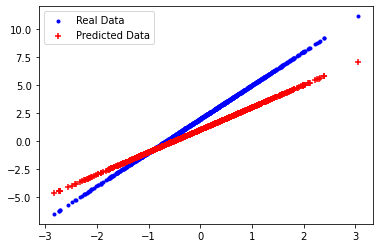

Current loss: 1.919465


In [34]:
plot_data(xs, ys, model(xs))
print('Current loss: %1.6f' % loss(model(xs), ys).numpy())

In [35]:
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
  dw, db = t.gradient(current_loss, [model.w, model.b])
  model.w.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)

  return current_loss

In [36]:
model = Model()

# Collect the history of W-values and b-values to plot later
list_w, list_b = [], []
epochs = range(15)
losses = []
for epoch in epochs:
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(model, xs, ys, learning_rate=0.1)
  losses.append(current_loss)
  print('Epoch %2d: w=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, list_w[-1], list_b[-1], current_loss))

Epoch  0: w=2.00 b=1.00, loss=1.91947
Epoch  1: w=2.18 b=1.20, loss=1.25214
Epoch  2: w=2.33 b=1.36, loss=0.81723
Epoch  3: w=2.45 b=1.49, loss=0.53364
Epoch  4: w=2.55 b=1.59, loss=0.34864
Epoch  5: w=2.64 b=1.67, loss=0.22789
Epoch  6: w=2.70 b=1.74, loss=0.14904
Epoch  7: w=2.76 b=1.79, loss=0.09752
Epoch  8: w=2.80 b=1.83, loss=0.06384
Epoch  9: w=2.84 b=1.87, loss=0.04181
Epoch 10: w=2.87 b=1.89, loss=0.02740
Epoch 11: w=2.89 b=1.92, loss=0.01797
Epoch 12: w=2.91 b=1.93, loss=0.01179
Epoch 13: w=2.93 b=1.95, loss=0.00774
Epoch 14: w=2.94 b=1.96, loss=0.00508


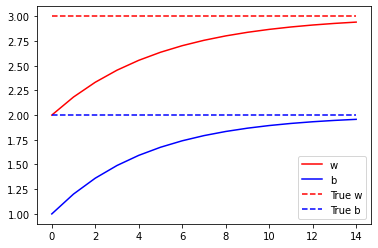

In [37]:
plt.plot(epochs, list_w, 'r',
       epochs, list_b, 'b')
plt.plot([TRUE_w] * len(epochs), 'r--',
      [TRUE_b] * len(epochs), 'b--')
plt.legend(['w', 'b', 'True w', 'True b'])
plt.show()

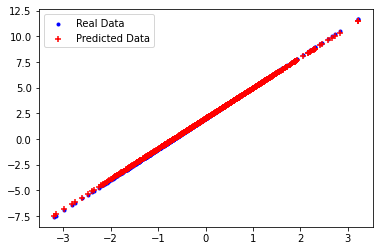

In [38]:
test_inputs  = tf.random.normal(shape=[NUM_EXAMPLES])
test_outputs = test_inputs * TRUE_w + TRUE_b

predicted_test_outputs = model(test_inputs)
plot_data(test_inputs, test_outputs, predicted_test_outputs)

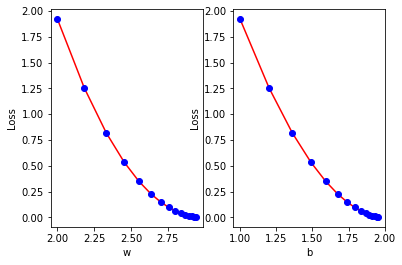

In [39]:
def plot_loss_for_weights(weights_list, losses):
  for idx, weights in enumerate(weights_list):
    plt.subplot(120 + idx + 1)
    plt.plot(weights['values'], losses, 'r')
    plt.plot(weights['values'], losses, 'bo')
    plt.xlabel(weights['name'])
    plt.ylabel('Loss')
    
    
weights_list = [{ 'name' : "w",
                  'values' : list_w
                },
                {
                  'name' : "b",
                  'values' : list_b
                }]

plot_loss_for_weights(weights_list, losses)